<a href="https://colab.research.google.com/github/daviddesancho/QuimicaFisicaII-Practicas/blob/master/partition_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mecánica estadística
### El significado de la función de partición
Vamos a usar python para explorar el significado de la función de partición en sistemas sencillos como los que hemos estudiado en el primer cuatrimestre de la asignatura. 

En primer lugar, como siempre en Python, importamos una serie de librerías que nos van a resultar útiles para nuestros cálculos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Vamos a escribir una función que nos permita calcular la **función de partición**

\begin{equation}
q = \sum_{i} \mathrm{e}^{-\beta \varepsilon_i}
\end{equation}


In [ ]:
def partition_function(temp, ener):
  """
  Calculates partition function from energy levels

  Parameters
  ----------
  temp : float
    Temperature
  ener : np.array, list
    Energy levels
      
  """
  beta = 1./temp # inverse thermal energy
  return np.sum([np.exp(-beta*e) for e in ener], axis=0)

En primer lugar, veremos cómo es la función de partición en el caso de que tenemos **dos niveles energéticos**, $\varepsilon_0=0$ y $\varepsilon_1=1$.

(0.0, 10.0)

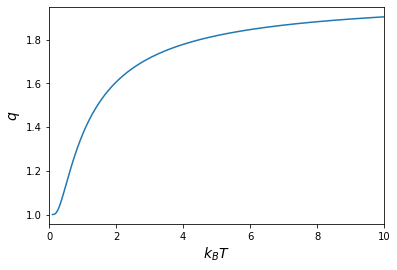

In [ ]:
temp = np.linspace(0.1, 10, 1000)

ener = [0, 1]

fig, ax = plt.subplots()
ax.plot(temp, partition_function(temp, ener ))
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$q$', fontsize=14)
ax.set_xlim(0,10)

Vemos que la función de partición pasa de tener un valor de 1 a baja temperatura y próximo a 2 a elevadas temperaturas.

¿Qué sucede si **cambiamos la energía** de los niveles?

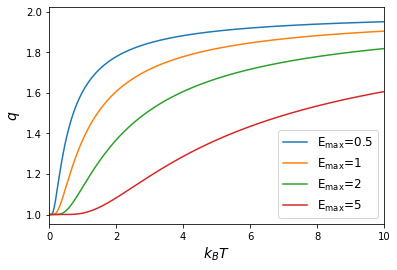

In [ ]:
temp = np.linspace(0.01, 20, 1000)

fig, ax = plt.subplots()
ener = [[0, 0.5], [0, 1], [0, 2], [0, 5]]
for e in ener:
  ax.plot(temp, partition_function(temp, e ), \
        label="E$_\mathrm{max}$=%g"%np.max(e))
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$q$', fontsize=14)
ax.set_xlim(0, 10)
_ = plt.legend(loc=4, fontsize=12)

Vemos que a baja temperatura en todos los casos convergemos al valor de $q=1$. A temperaturas más elevadas, dependiendo de la energía del nivel superior la función de partición va aumentando más o menos rápidamente con la temperatura. 

De la misma manera, podemos modificar el número de niveles energéticos para ver su efecto en la función de partición.

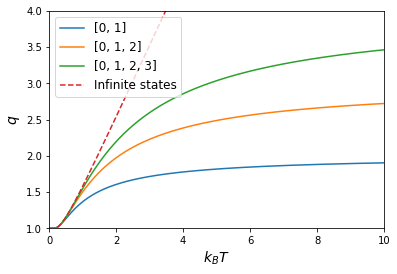

In [ ]:
temp = np.linspace(0.01, 20, 1000)

fig, ax = plt.subplots()
ener = [[0, 1], [0, 1, 2], [0, 1, 2, 3]]
for e in ener: 
  ax.plot(temp, partition_function(temp, e), \
        label=e)
ax.plot(temp, 1./(1 - np.exp(-1./temp)), '--', label='Infinite states')
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$q$', fontsize=14)
ax.set_xlim(0, 10)
ax.set_ylim(1, 4)
plt.legend(loc=2, fontsize=12)

Aquí podemos ver que al aumentar el número de niveles energético cambia la función de partición, y a temperaturas elevadas va adoptando valores más altos, dado que todos los términos exponenciales $\mathrm{e}^{-\beta\varepsilon_i}$ se hacen 0. En el límite de infinitos estados,  por tanto
\begin{equation}
\lim_{T\rightarrow \infty} q=\infty
\end{equation}
En el caso de que haya infinitos estados con un espaciado constante de la energía, $\varepsilon$ , podemos escribir la función de partición como
\begin{equation}
q = \frac{1}{1+ \mathrm{e}^{-\beta\varepsilon}}
\end{equation}

También podemos probar a modificar la **degeneración** de los niveles energéticos y comparar los resultados con los que hemos obtenido hasta ahora.

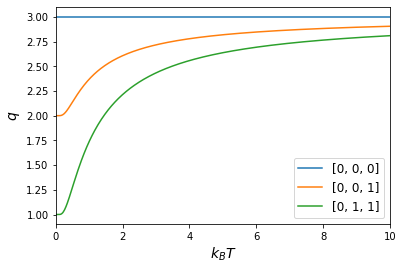

In [ ]:
temp = np.linspace(0.01, 20, 1000)

fig, ax = plt.subplots()
ener = [[0, 0, 0], [0, 0, 1], [0, 1, 1]]
for e in ener: 
  ax.plot(temp, partition_function(temp, e), \
        label=e)
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$q$', fontsize=14)
ax.set_xlim(0, 10)
plt.legend(loc=4, fontsize=12)

Así vemos que a temperaturas bajas $q$ converge a la degeneración de estados de mínima energía y a temperatura elevada al número total de estados.

Por tanto, la **función de partición nos da una estimación del número de estados accesibles** para la molécula a la temperatura en la que nos encontremos.

## La población de los estados
Una vez que hemos comprendido el significado de la función de partición, podemos calcular qué población tiene cada uno de los estados. Comencemos por el caso de un sistema de dos estados, donde podemos escribir la población de cada estado como
\begin{equation}
p_i=\frac{\mathrm{e}^{-\beta\varepsilon_i}}{q}
\end{equation}


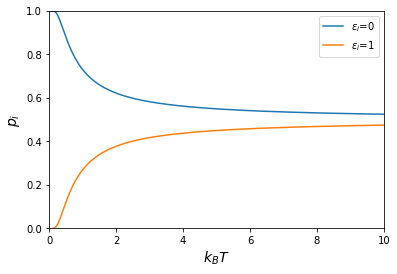

In [ ]:
temp = np.linspace(0.1, 10, 1000)

ener = [0, 1]
qval = partition_function(temp, ener)
fig, ax = plt.subplots()
for i, e in enumerate(ener):
  ax.plot(temp, np.exp(-e/temp)/qval, label="$\epsilon_i$=%g"%e)
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$p_i$', fontsize=14)
ax.set_xlim(0,10)
ax.set_ylim(0,1)
plt.legend()

Vemos que a temperaturas elevadas la población de los dos estados converge a $p_0=p_1=1/2$. En el caso de tener infinitos estados, también nos encontramos con que estos se pueblan de manera uniforme.

Otra observación interesante es la dependencia de las poblaciones con la diferencia en energía.


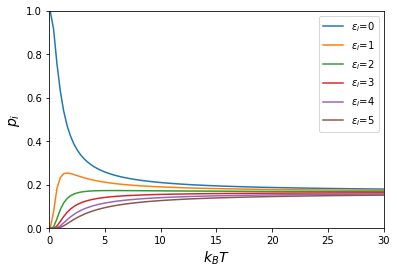

In [ ]:
temp = np.linspace(0.1, 30, 100)

ener = range(6)
qval = partition_function(temp, ener)
fig, ax = plt.subplots()
for i, e in enumerate(ener):
  ax.plot(temp, np.exp(-e/temp)/qval, label="$\epsilon_i$=%g"%e)
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$p_i$', fontsize=14)
ax.set_xlim(0,30)
ax.set_ylim(0,1)
plt.legend()

¿En qué circunstancias nos encontramos con que los estados no se pueblan uniformemente? En el caso de que exista **degeneración energética**, veremos que el estado degenerado se puebla mucho más que el estado no degenerado, cuya población acaba convergiendo a cero para degeneraciones muy grandes. Además, la estabilidad del estado más estable dependerá del "gap" de energía.

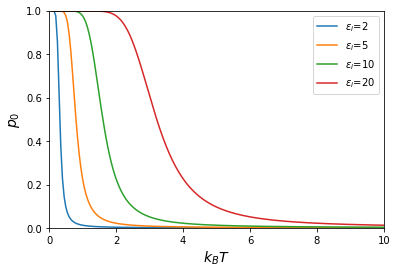

In [ ]:
temp = np.linspace(0.1, 50, 1000)

fig, ax = plt.subplots()
for eval in [2, 5, 10, 20]:
  ener = [0] + 500*[eval]
  qval = partition_function(temp, ener)
  ax.plot(temp, np.exp(-ener[0]/temp)/qval, label="$\epsilon_i$=%g"%eval)
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$p_0$', fontsize=14)
ax.set_xlim(0,10)
ax.set_ylim(0,1)
plt.legend()

A partir de la información sobre la función de partición y las poblaciones de los estados, podemos calcular la energía promedio del sistema como
\begin{equation}
E/N= -\frac{1}{q}\frac{dq}{d\beta}
\end{equation}


(0.0, 1.0)

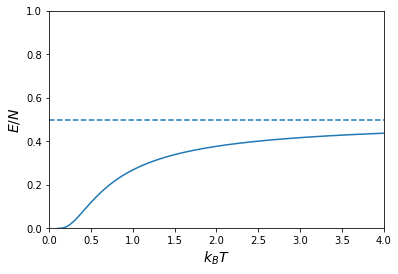

In [ ]:
temp = np.linspace(0.1, 4, 1000)

ener = [0, 1]
qval = partition_function(temp, ener)
fig, ax = plt.subplots()
e_ave = 0.
for i,e in enumerate(ener):
  e_ave += e*np.exp(-e/temp)/qval
ax.plot(temp, e_ave)
ax.axhline(0.5, 0, temp[-1], ls='--')
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$E/N$', fontsize=14)
ax.set_xlim(0,4)
ax.set_ylim(0,1)

Como vemos, la energía converge al nivel esperado de 0.5.

Usando la energía, también podemos calcular directamente la
entropía
\begin{equation}
    S=\frac{U-U(0)}{T} + Nk\ln q
\end{equation}

(0.0, 1.0)

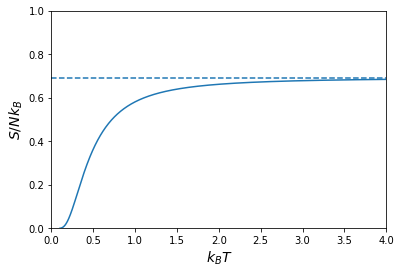

In [ ]:
temp = np.linspace(0.1, 4, 1000)

ener = [0, 1]
qval = partition_function(temp, ener)
fig, ax = plt.subplots()
ax.plot(temp, e_ave/temp + np.log(qval))
ax.axhline(np.log(2), 0, temp[-1], ls='--')
ax.set_xlabel('$k_BT$', fontsize=14)
ax.set_ylabel('$S/Nk_B$', fontsize=14)
ax.set_xlim(0,4)
ax.set_ylim(0,1)